# Universidad de Buenos Aires
# Procesamiento de Lenguaje Natural - Desafio: 5
# Alumno: Matias Werbin

In [ ]:
# importacion transformers

!pip install transformers --quiet

In [ ]:
# importación de librerias

import tensorflow
from transformers import TFBertModel
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats


## Modelo

In [ ]:
# Muy importante que para tensorflow los modelos Bert deben empezar con "TF"
# de lo contrario estaremos utilizando un modelo para pytorch

bert_model=TFBertModel.from_pretrained("bert-base-uncased") # Bert Base

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
# Definicion de longitud maxima de secuencia y clases de salida

max_length = 139 # Mediana
output_shape = 5


In [ ]:
bert_model.bert.trainable = False # congelamos a bert como encoder

input_ids = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='input_ids')
attention_mask = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='attention_mask')

outputs = bert_model(input_ids, attention_mask=attention_mask)

pooled_output = outputs.pooler_output

x = tensorflow.keras.layers.Dropout(0.25)(pooled_output)

# x=tensorflow.keras.layers.Dense(128,activation='relu')(x)

output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(x)

model = tensorflow.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 139)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 139)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 139, 7                                       

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',tensorflow.keras.metrics.F1Score(average='macro')])


## Dataset

In [ ]:
# Descargar dataset
!curl -L -o 'apps.csv' 'https://drive.google.com/u/0/uc?id=1S6qMioqPJjyBLpLVz4gmRTnJHnjitnuV&export=download&confirm=t'
!curl -L -o 'reviews.csv' 'https://drive.google.com/u/0/uc?id=1zdmewp7ayS4js4VtrJEHzAheSW-5NBZv&export=download&confirm=t'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  131k  100  131k    0     0  44401      0  0:00:03  0:00:03 --:--:-- 50557
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 7002k  100 7002k    0     0   431k      0  0:00:16  0:00:16 --:--:-- 1506k


In [ ]:
df=pd.read_csv('/content/reviews.csv')

In [ ]:
df.head()

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,Andrew Thomas,https://lh3.googleusercontent.com/a-/AOh14GiHd...,Update: After getting a response from the deve...,1,21,4.17.0.3,2020-04-05 22:25:57,"According to our TOS, and the term you have ag...",2020-04-05 15:10:24,most_relevant,com.anydo
1,Craig Haines,https://lh3.googleusercontent.com/-hoe0kwSJgPQ...,Used it for a fair amount of time without any ...,1,11,4.17.0.3,2020-04-04 13:40:01,It sounds like you logged in with a different ...,2020-04-05 15:11:35,most_relevant,com.anydo
2,steven adkins,https://lh3.googleusercontent.com/a-/AOh14GiXw...,Your app sucks now!!!!! Used to be good but no...,1,17,4.17.0.3,2020-04-01 16:18:13,This sounds odd! We are not aware of any issue...,2020-04-02 16:05:56,most_relevant,com.anydo
3,Lars Panzerbjørn,https://lh3.googleusercontent.com/a-/AOh14Gg-h...,"It seems OK, but very basic. Recurring tasks n...",1,192,4.17.0.2,2020-03-12 08:17:34,We do offer this option as part of the Advance...,2020-03-15 06:20:13,most_relevant,com.anydo
4,Scott Prewitt,https://lh3.googleusercontent.com/-K-X1-YsVd6U...,Absolutely worthless. This app runs a prohibit...,1,42,4.17.0.2,2020-03-14 17:41:01,We're sorry you feel this way! 90% of the app ...,2020-03-15 23:45:51,most_relevant,com.anydo


In [ ]:
print(f'La cantidad de criticas disponibles en el dataset reviews : {len(df)}')


average_length = sum([len(x) for x in df['content']]) / len(df['content'])


print(f'En promedio, cada criica tiene un longitud de secuencia de: {round(average_length,0)}')

La cantidad de criticas disponibles en el dataset reviews : 15746
En promedio, cada criica tiene un longitud de secuencia de: 181.0


<ipython-input-11-97a6ad22c126>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(scores_count))


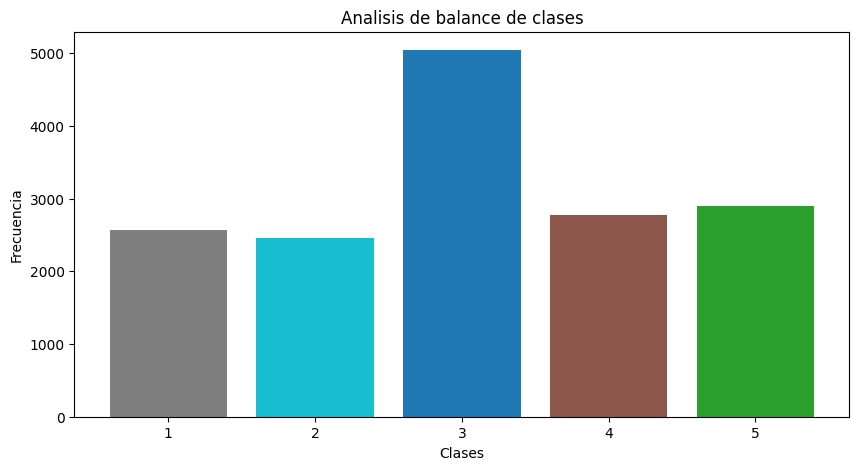

In [ ]:
scores_count=df['score'].value_counts()

colors = plt.cm.get_cmap('tab10', len(scores_count))

plt.figure(figsize=(10,5))
plt.bar(x=scores_count.index, height=scores_count.values,color=[colors(i) for i in range(len(scores_count))])
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.title('Analisis de balance de clases')
plt.show()

Se puede observar un desbalance de clases. La clase 3 tiene una frecuencia de aparación mayor que el resto de las clases

Mediana: 139.0
Media 181.0
Moda ModeResult(mode=4, count=178)


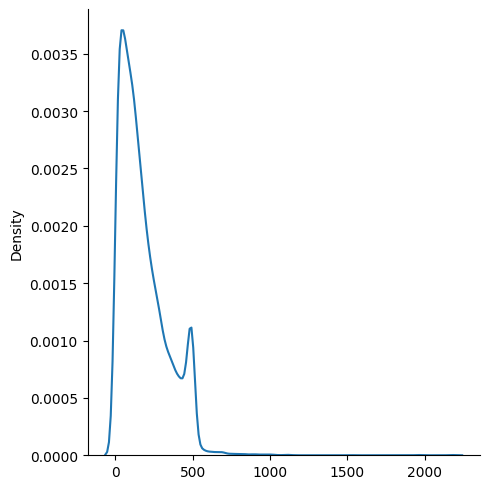

In [ ]:
sentences=df.content.values
sentence_lens = [len(sentence) for sentence in sentences]

print("Mediana:", round(np.median(sentence_lens),0))
print('Media', round(np.mean(sentence_lens),0))
print('Moda', stats.mode(sentence_lens))
sns.displot(sentence_lens, kind='kde')

In [ ]:
from tensorflow.keras.utils import to_categorical

y = df['score'].values - 1
y = to_categorical(y)
output_shape = y.shape[1]


In [ ]:
output_shape

5

In [ ]:
# validamos: sabemos del print de la celda que el registro de idx 0 debe ser [1,0,0,0, ] y el de inx 15745 [0,0,0,0,1]

print(y[:1])
print(y[-1:])


[[1. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 1.]]


Vemos que ahora nuestra target no esta one hot encoding por lo que la perdida a utilizar debe ser categorical crossentropy

## Tokenizacion y Data generator

In [ ]:
from transformers import InputExample, InputFeatures  # Métodos para transformar el dataset
from transformers import BertTokenizer

# Descargamos tokenizer
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
from sklearn.model_selection import train_test_split

max_length=139 # Valor de Mediana
indices=np.arange(len(sentences))
indices = np.arange(len(sentences))
idx_train_val, idx_test = train_test_split(indices, test_size=0.20, random_state=74)
idx_train, idx_val = train_test_split(idx_train_val, test_size=0.25, random_state=74)

In [ ]:
print(f"Cantidad de muestras en train {idx_train.shape[0]}")
print(f"Cantidad de muestras en valid {idx_val.shape[0]}")
print(f"Cantidad de muestras en test {idx_test.shape[0]}")

Cantidad de muestras en train 9447
Cantidad de muestras en valid 3149
Cantidad de muestras en test 3150


In [ ]:
# Funciones de generacion

def convert_data_to_examples(text, labels, idx_train, idx_val):
    """
    Propósito:
    Esta función convierte los datos de texto y etiquetas en "InputExamples" que luego se usarán para alimentar a un modelo.

    Parámetros:
    text: Lista de textos que se desea procesar.
    labels: Lista de etiquetas correspondientes a los textos.
    idx_train: Índices de los textos que se usarán para entrenamiento.
    idx_val: Índices de los textos que se usarán para validación.

    Funcionamiento:
    train_InputExamples: Lista de ejemplos de entrenamiento, donde cada ejemplo está compuesto por el texto (text_a) y su etiqueta (label).
    validation_InputExamples: Lista de ejemplos de validación similar a la de entrenamiento.
    Salida: Devuelve dos listas de InputExamples, una para entrenamiento y otra para validación.
    """

    # Armamos un "InputExample" para los datos de entrenamiento y validación
    train_InputExamples = [InputExample(guid=None,
                                        text_a=text[i],
                                        text_b=None,
                                        label=labels[i]) for i in idx_train]

    validation_InputExamples = [InputExample(guid=None,
                                             text_a=text[i],
                                             text_b=None,
                                             label=labels[i]) for i in idx_val]

    return train_InputExamples, validation_InputExamples

def convert_examples_to_tf_dataset(examples, bert_tokenizer, max_length=512):
    """
    Propósito: Convierte los ejemplos en un tf.data.Dataset, un formato que es fácil de manejar por TensorFlow para entrenar modelos.

    Parámetros:
    examples: Lista de InputExamples generados previamente.
    bert_tokenizer: Tokenizador BERT que convierte el texto en una secuencia de tokens.
    max_length: Longitud máxima de las secuencias de entrada (por defecto 512).
    """

    features = []

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = bert_tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=False,
            return_attention_mask=True,
            padding='max_length', # pads to the right by default
            truncation=True
        )

        input_ids, attention_mask = (input_dict["input_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, label=e.label
            )
        )

    def gen():
        # Función generadora para no levantar todos los datos en un instante
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                },
                f.label,
            )

    return tensorflow.data.Dataset.from_generator(
        # Tensorflow dataset generator (basado en el generador y en el esquema de datos definido)
        gen,
        ({"input_ids": tensorflow.int32, "attention_mask": tensorflow.int32}, tensorflow.float32),
        (
            {
                "input_ids": tensorflow.TensorShape([None]),
                "attention_mask": tensorflow.TensorShape([None]),
            },
            tensorflow.TensorShape([output_shape]),
        ),
    )


In [ ]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(sentences, y, idx_train, idx_val)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), bert_tokenizer, max_length=max_length)
# shuffle 100 --> mezcla los datos y los lee a de 100 unidades
# batch 32 --> ejecuta una epoca de entrenamiento de a 32 unidades
train_data = train_data.shuffle(100).batch(32)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), bert_tokenizer, max_length=max_length)
validation_data = validation_data.batch(32)

In [ ]:
pred_sentences = [sentences[i] for i in idx_test]
tf_batch = bert_tokenizer(pred_sentences, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

In [ ]:
X_test = [tf_batch['input_ids'],
          tf_batch['attention_mask']]

y_test = y[idx_test]

In [ ]:
train_data

<_BatchDataset element_spec=({'input_ids': TensorSpec(shape=(None, None), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(None, None), dtype=tf.int32, name=None)}, TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

## BERT classifications

In [ ]:
history = model.fit(
    train_data,
    epochs=15,
    validation_data=validation_data
)

Epoch 1/15
296/296 [==============================] - 147s 439ms/step - loss: 1.6263 - accuracy: 0.2832 - f1_score: 0.2226 - val_loss: 1.5097 - val_accuracy: 0.3141 - val_f1_score: 0.2531
Epoch 2/15
296/296 [==============================] - 127s 429ms/step - loss: 1.5478 - accuracy: 0.3226 - f1_score: 0.2584 - val_loss: 1.4594 - val_accuracy: 0.3687 - val_f1_score: 0.3079
Epoch 3/15
296/296 [==============================] - 127s 430ms/step - loss: 1.5058 - accuracy: 0.3425 - f1_score: 0.2804 - val_loss: 1.4415 - val_accuracy: 0.3382 - val_f1_score: 0.3051
Epoch 4/15
296/296 [==============================] - 128s 431ms/step - loss: 1.4664 - accuracy: 0.3653 - f1_score: 0.3006 - val_loss: 1.4029 - val_accuracy: 0.3909 - val_f1_score: 0.3375
Epoch 5/15
296/296 [==============================] - 127s 430ms/step - loss: 1.4425 - accuracy: 0.3760 - f1_score: 0.3053 - val_loss: 1.4097 - val_accuracy: 0.3690 - val_f1_score: 0.2688
Epoch 6/15
296/296 [==============================] - 138s 4

In [ ]:
# Guardar el modelo completo (estructura + pesos)
model.save('/content/bert_model.keras')

# Guardar solo los pesos del modelo
model.save_weights('/content/bert_weights.h5')


/usr/local/lib/python3.10/dist-packages/transformers/generation/tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


In [ ]:
def plot_train_metrics(history):
    epoch_count = range(1, len(history.history['accuracy']) + 1)

    # Crear una figura con 3 subgráficas
    fig, axes = plt.subplots(3, 1, figsize=(10, 15))

    # Graficar Accuracy
    sns.lineplot(x=epoch_count, y=history.history['accuracy'], label='train', ax=axes[0])
    sns.lineplot(x=epoch_count, y=history.history['val_accuracy'], label='valid', ax=axes[0])
    axes[0].set_title('Training and Validation Accuracy')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()

    # Graficar F1 Score Macro

    sns.lineplot(x=epoch_count, y=history.history['f1_score'], label='train', ax=axes[1])
    sns.lineplot(x=epoch_count, y=history.history['val_f1_score'], label='valid', ax=axes[1])
    axes[1].set_title('Training and Validation F1 Score Macro')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('F1 Score Macro')
    axes[1].legend()

    # Graficar Loss
    sns.lineplot(x=epoch_count, y=history.history['loss'], label='train', ax=axes[2])
    sns.lineplot(x=epoch_count, y=history.history['val_loss'], label='valid', ax=axes[2])
    axes[2].set_title('Training and Validation Loss')
    axes[2].set_xlabel('Epochs')
    axes[2].set_ylabel('Loss')
    axes[2].legend()

    plt.tight_layout()
    plt.show()


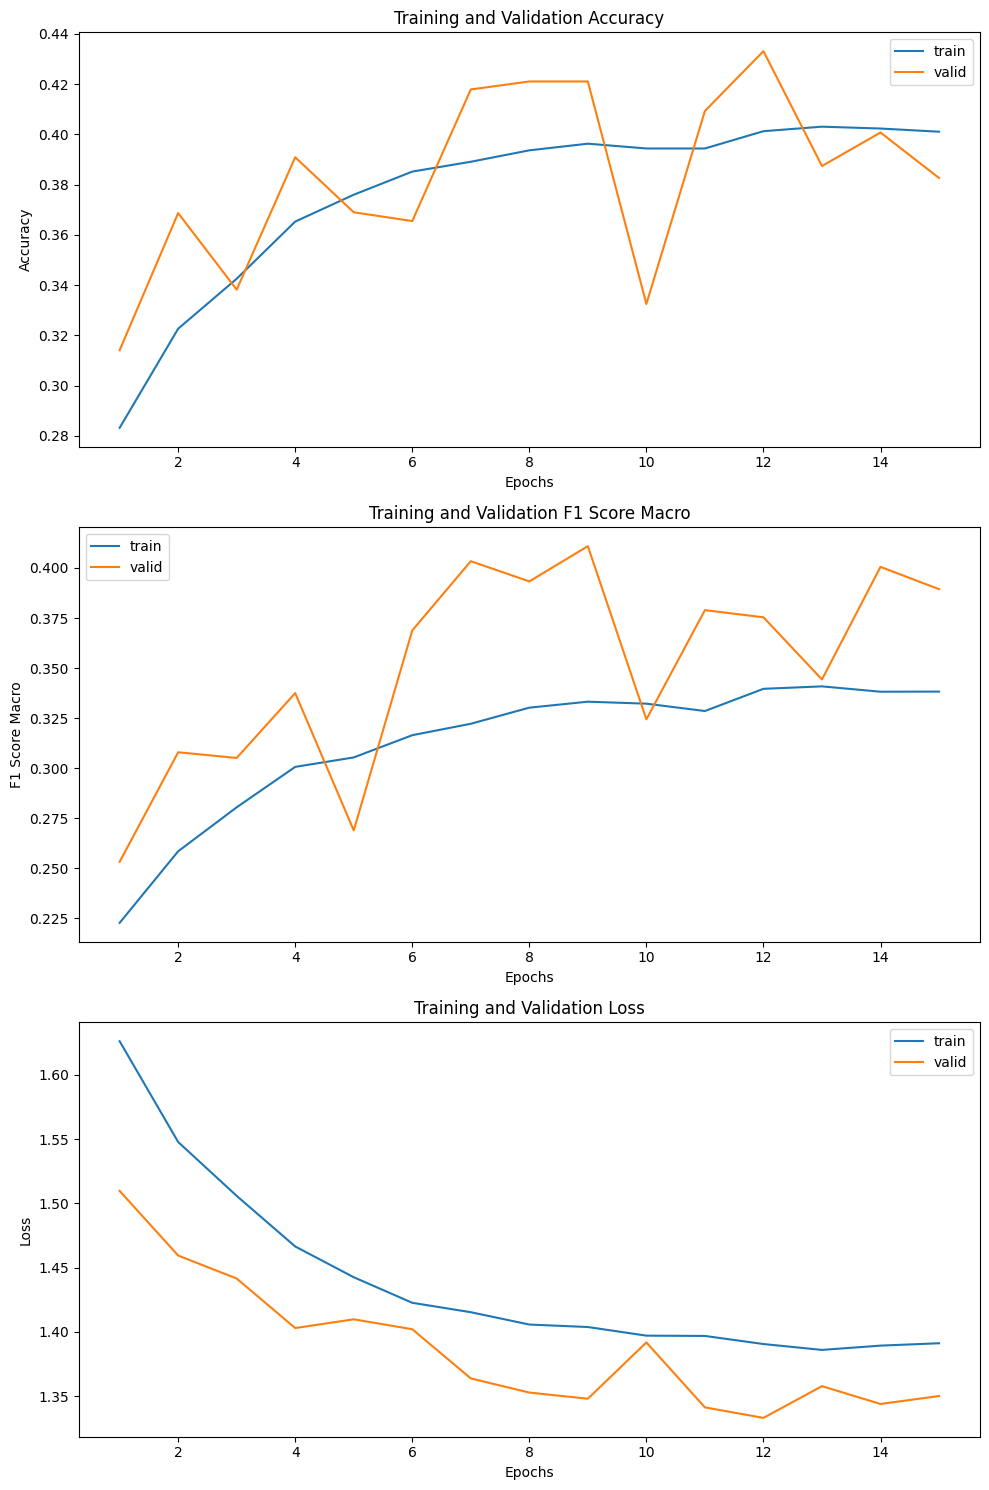

In [ ]:
plot_train_metrics(history)

Podemos observar a priori que el modelo todavia no converge en 15 epochs y le queda bastante por aprender ya que vemos que tanto las metricas aumentan y la loss disminuye.

In [ ]:
y_hat_prob = model.predict(X_test)
print(y_hat_prob[:1]) # nuestro modelo predice que la clase mas probable es la 1
print(y_hat_prob[-1:]) # nuestro modelo predice que la clase mas probable es la 2

99/99 [==============================] - 33s 306ms/step
[[0.38844502 0.34783888 0.15324794 0.07844099 0.03202715]]
[[0.18482539 0.30193368 0.22693332 0.19773693 0.08857074]]


In [ ]:
y_test[:1] # el modelo acertó

array([[1., 0., 0., 0., 0.]])

In [ ]:
y_test[-1:] # el modelo se confundió

array([[0., 0., 0., 1., 0.]])

In [ ]:
scores=model.evaluate(X_test,y_test)
print("Acurracy:", scores[1])
print("F1 Score:", scores[2])

99/99 [==============================] - 34s 306ms/step - loss: 1.3359 - accuracy: 0.3848 - f1_score: 0.3912
Acurracy: 0.38476189970970154
F1 Score: 0.3911861777305603


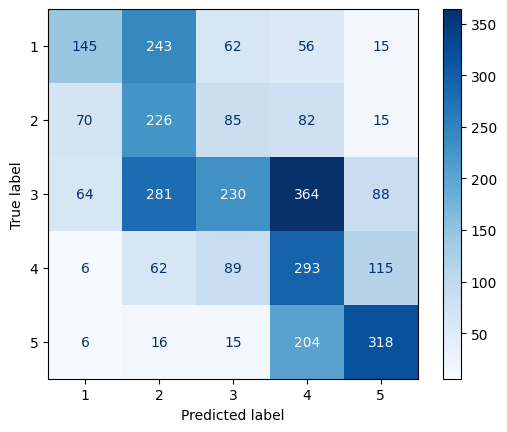

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Suponiendo que y_hat_prob tiene las probabilidades predichas
y_hat = np.argmax(y_hat_prob, axis=1)

# Generar la matriz de confusión
cm = confusion_matrix(y_test.argmax(axis=1), y_hat)

# Mostrar la matriz de confusión con 4 clases
cmd = ConfusionMatrixDisplay(cm, display_labels=list(range(1,6)))
cmd.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Convertir y_test a etiquetas de clase
y_true = np.argmax(y_test, axis=1)

# Generar el reporte de clasificación
report = classification_report(y_true, y_pred,target_names=["1","2","3","4","5"])
print(report)

99/99 [==============================] - 31s 310ms/step
              precision    recall  f1-score   support

           1       0.50      0.28      0.36       521
           2       0.27      0.47      0.35       478
           3       0.48      0.22      0.31      1027
           4       0.29      0.52      0.37       565
           5       0.58      0.57      0.57       559

    accuracy                           0.38      3150
   macro avg       0.42      0.41      0.39      3150
weighted avg       0.43      0.38      0.38      3150



Veamos ahora haciendo un fine tuning en vez de unicamente encoder feature extraction

## Ensayos

In [ ]:
text = "I love this app!"

#tf_batch = bert_tokenizer(text, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

tf_batch = bert_tokenizer.encode_plus(
    text,
    add_special_tokens=True,
    max_length=max_length, # truncates if len(s) > max_length
    return_token_type_ids=False,
    return_attention_mask=True,
    pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
    truncation=True,
    return_tensors='tf'
)

print("Inputs ids:", tf_batch['input_ids'])
print("Attention mask:", tf_batch['attention_mask'])

Inputs ids: tf.Tensor(
[[  101  1045  2293  2023 10439   999   102     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]], shape=(1, 139), dtype=int32)
Attention mask: tf.Tensor(
[[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
X_ensayo = [tf_batch['input_ids'],
          tf_batch['attention_mask']]

In [ ]:
y_prob_ensayo = model.predict(X_ensayo)
y_prob = np.argmax(y_prob_ensayo, axis=1) + 1 # argmax devuelve indice
print("Puntaje:", y_prob)

1/1 [==============================] - 0s 57ms/step
Puntaje: [5]


In [ ]:
text = "I hate this app!"

#tf_batch = bert_tokenizer(text, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

tf_batch = bert_tokenizer.encode_plus(
    text,
    add_special_tokens=True,
    max_length=max_length, # truncates if len(s) > max_length
    return_token_type_ids=False,
    return_attention_mask=True,
    pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
    truncation=True,
    return_tensors='tf'
)

print("Inputs ids:", tf_batch['input_ids'])
print("Attention mask:", tf_batch['attention_mask'])

Inputs ids: tf.Tensor(
[[  101  1045  5223  2023 10439   999   102     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]], shape=(1, 139), dtype=int32)
Attention mask: tf.Tensor(
[[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
X_ensayo = [tf_batch['input_ids'],
          tf_batch['attention_mask']]

In [ ]:
y_prob_ensayo = model.predict(X_ensayo)
y_prob = np.argmax(y_prob_ensayo, axis=1) + 1 # +1 porque argmax devuelve indice
print("Puntaje:", y_prob)

1/1 [==============================] - 0s 75ms/step
Puntaje: [5]


## Conclusión

Luego de evaluar el modelo con la matriz de confusión y el reporte de clasificación, concluimos que el modelo tiene dificultades para clasificar correctamente la mayoría de las clases, excepto la clase 5, que tiene un f1-score de 0.57. Las demás clases tienen f1-scores inferiores a 0.40.

Se realizaron pruebas con palabras negativas (como "hate") y positivas (como "love"), y el modelo respondió adecuadamente.

El modelo necesita mejorar, ya que solo predice correctamente el 38% de las clases positivas